# Exploratory Data Analysis (EDA) for Province Load Forecasting

**Objective:**  
Analyze the cleaned load data per province over time to understand trends, seasonality, and anomalies. Each province will be examined separately to capture unique patterns.

**Steps:**
- Load the cleaned data.
- Check summary statistics and missing data per province.
- Visualize load trends for each province individually.
- Compare distributions and detect outliers for each province.



In [6]:
import os
import pandas as pd
# Define the path to the cleaned dataset
data_path = os.path.join("..", "data", "processed", "clean_provinceDATA.csv")


# Load the dataset
df = pd.read_csv(data_path, parse_dates=['PERIOD_START_TIME'])

# Display the first few rows
print("Dataset loaded successfully!")
df.head()

Dataset loaded successfully!


,PERIOD_START_TIME,PROVINCE,CELLS,CELL_AVAIL,LCELLUNAVAILDURSYS,CELL_AVAIL_SYS_exc,CELL_AVAIL_MAN,ERAB_Setup_Succ_Rate_Added,ERAB_EST_SUC_INITIAL,RRC_SSR_SIGNALING,...,Throughput_UE_QCI9_DL_kbps,Voice_Payload_Per_VoLTE_Erlang,RSRP_UL_PUSCH_dB_Avg,RSRP_UL_PUCCH_dBm_Avg,Payload_PDCP_DL_GByte,Payload_PDCP_UL_GByte,Payload_PDCP_Total_GByte,Last_TTI_Payload_Ratio_DL_QCI9,Small_Pkt_Payload_Ratio_UL_All,Throughput_UE_SplitMCG_UL_kbps
0,2023-02-23,KORDESTAN_LMBB,2454.29,99.42,528660,99.75,99.67,99.75,99.80,99.32,...,18459.86,3.29,-116.22,-113.85,144662.42,NaN,NaN,23.00,NaN,NaN
1,2023-02-23,HAMEDAN_LMBB,3102.13,99.46,424575,99.84,99.61,99.73,99.78,99.56,...,20418.05,3.65,-115.07,-112.80,233158.68,NaN,NaN,19.48,NaN,NaN
2,2023-02-23,LORESTAN_LMBB,2915.00,99.78,469230,99.81,99.97,99.81,99.79,99.64,...,19465.79,3.76,-114.88,-113.41,221301.03,NaN,NaN,18.00,NaN,NaN
3,2023-02-23,KERMANSHAH_LMBB,3615.67,99.95,58025,99.98,99.97,99.81,99.83,99.67,...,20149.32,3.52,-115.34,-113.03,239092.73,NaN,NaN,18.04,NaN,NaN
4,2023-02-23,ZANJAN_LMBB,1577.00,99.21,42895,99.97,99.24,99.79,99.75,99.45,...,16536.57,3.58,-117.44,-114.44,136781.58,NaN,NaN,18.93,NaN,NaN


In [10]:
# Overall summary
print("Overall data summary:")
print(df.describe())

# Summary statistics by province
province_stats = df.groupby('PROVINCE')['Load'].describe()
print("Summary statistics by province:")
print(province_stats)

# Count missing values per province
missing_by_province = df.groupby('PROVINCE').apply(lambda x: x.isnull().sum())
print("Missing values per province:")
print(missing_by_province)



Overall data summary:
         PERIOD_START_TIME        CELLS   CELL_AVAIL  LCELLUNAVAILDURSYS  \
count                 8118  8118.000000  8118.000000        8.118000e+03   
mean   2024-02-26 12:00:00  3521.431436    99.436035        1.461879e+06   
min    2023-02-23 00:00:00  1000.210000    95.130000        0.000000e+00   
25%    2023-08-26 00:00:00  2464.410000    99.280000        4.306512e+05   
50%    2024-02-26 12:00:00  2830.915000    99.620000        8.920600e+05   
75%    2024-08-29 00:00:00  3667.385000    99.790000        1.738079e+06   
max    2025-03-01 00:00:00  8805.920000   100.000000        2.668341e+07   
std                    NaN  2066.569931     0.551384        1.832926e+06   

       CELL_AVAIL_SYS_exc  CELL_AVAIL_MAN  ERAB_Setup_Succ_Rate_Added  \
count         8118.000000     8118.000000                 8118.000000   
mean            99.512212       99.923930                   99.746861   
min             95.930000       97.810000                   83.800000   
2

C:\Users\hossein.hab\AppData\Local\Temp\ipykernel_27816\2418754646.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_by_province = df.groupby('PROVINCE').apply(lambda x: x.isnull().sum())


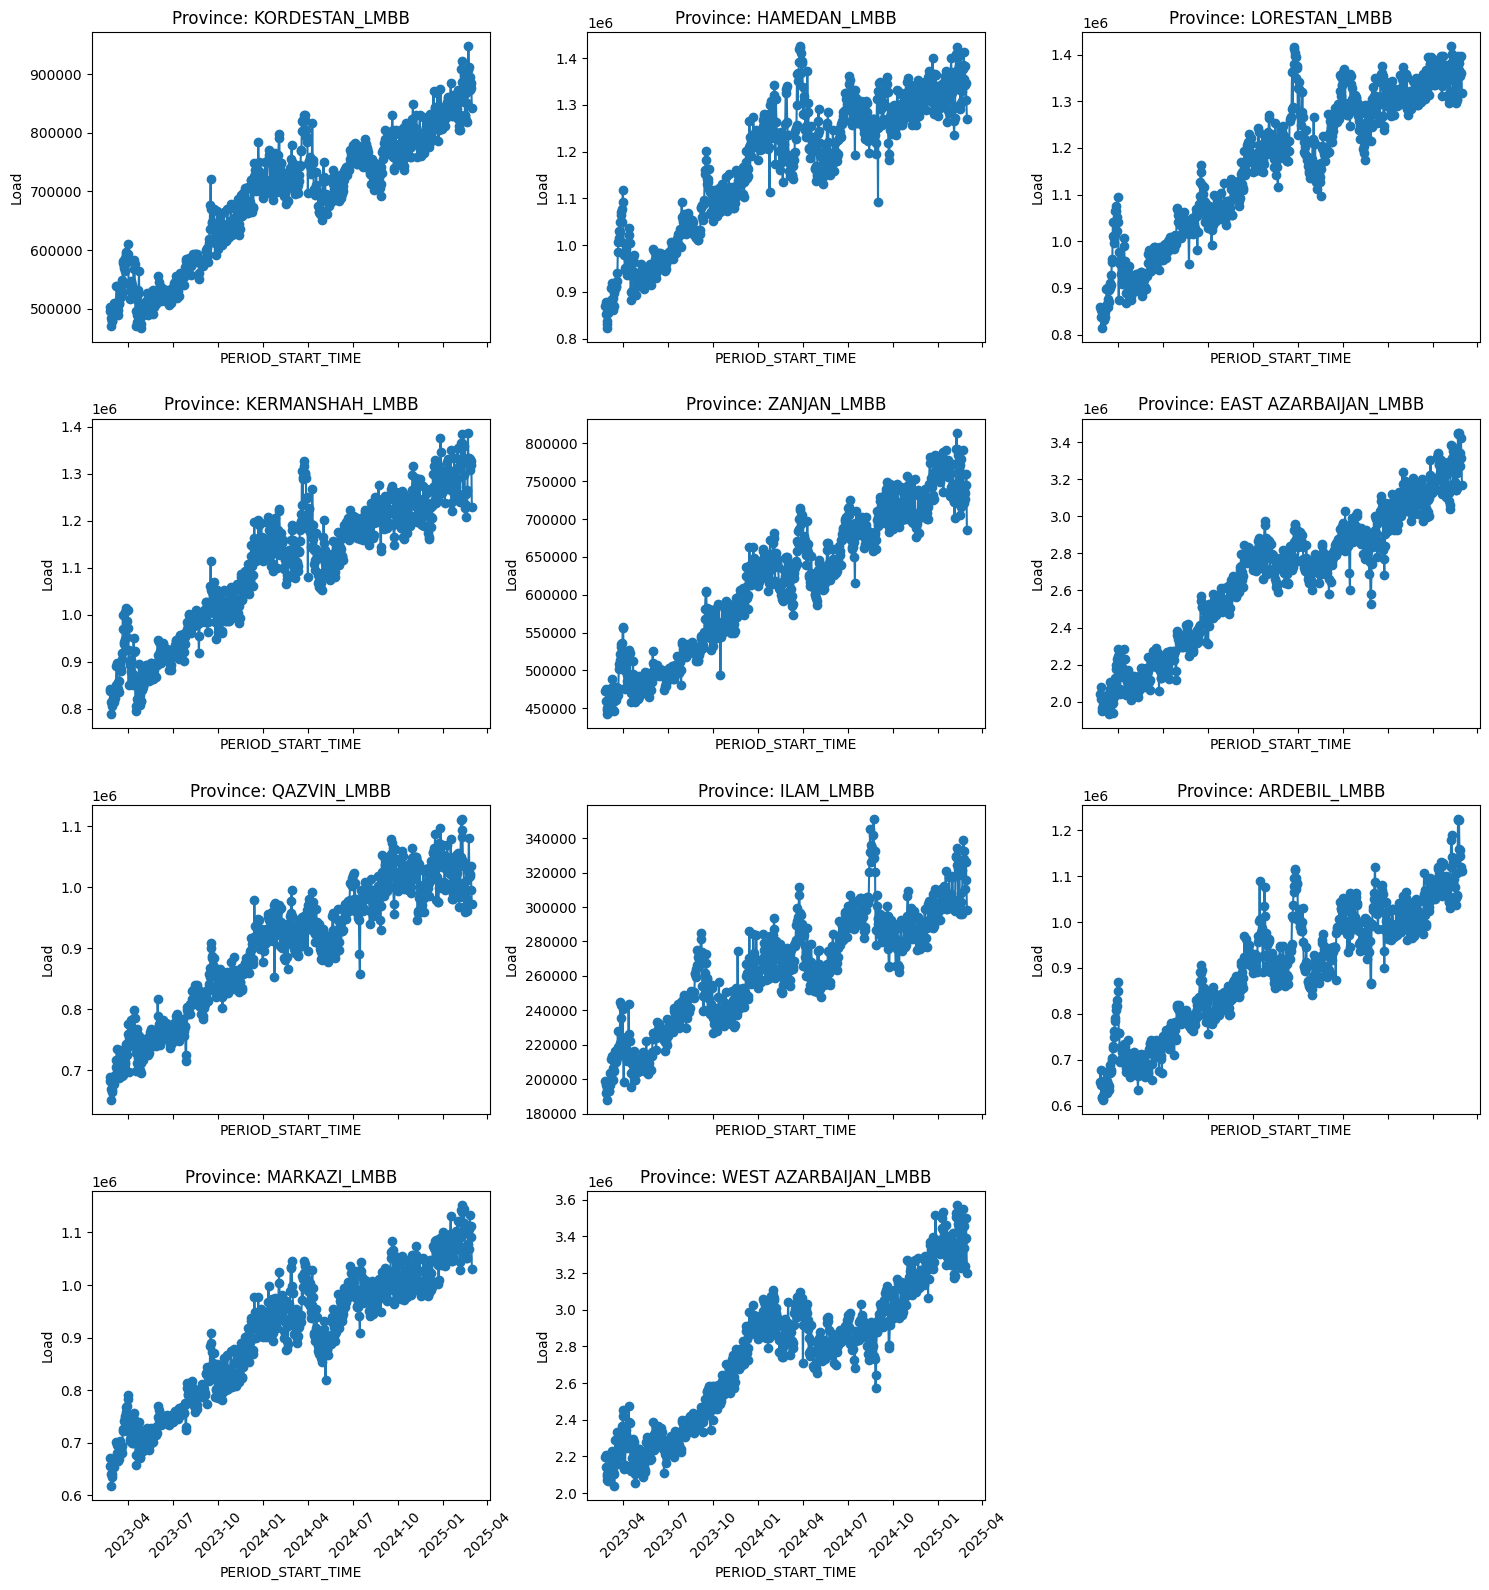

In [11]:
import matplotlib.pyplot as plt

provinces = df['PROVINCE'].unique()
n_provinces = len(provinces)
cols = 3
rows = (n_provinces + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(15, rows*4), sharex=True)
axes = axes.flatten()

for i, prov in enumerate(provinces):
    subset = df[df['PROVINCE'] == prov]
    axes[i].plot(subset['PERIOD_START_TIME'], subset['Load'], marker='o', linestyle='-')
    axes[i].set_title(f"Province: {prov}")
    axes[i].set_xlabel("PERIOD_START_TIME")
    axes[i].set_ylabel("Load")
    axes[i].tick_params(axis='x', rotation=45)

# Hide any extra subplots
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


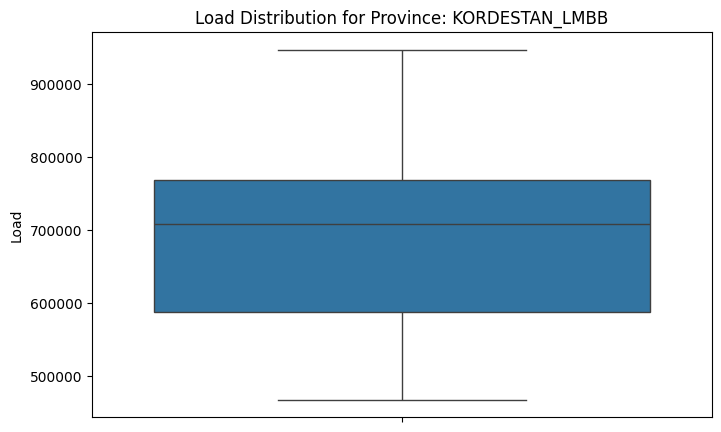

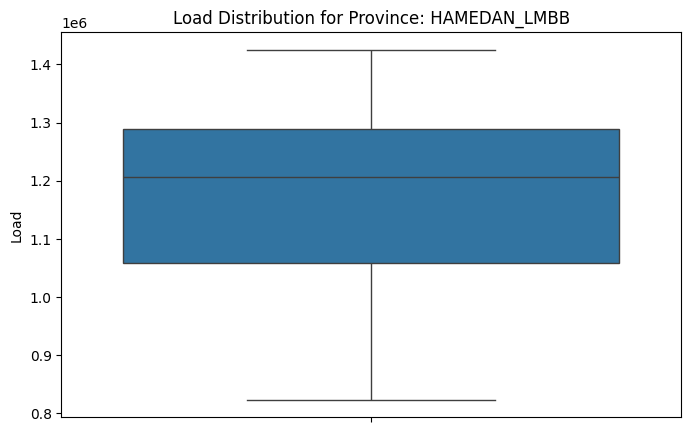

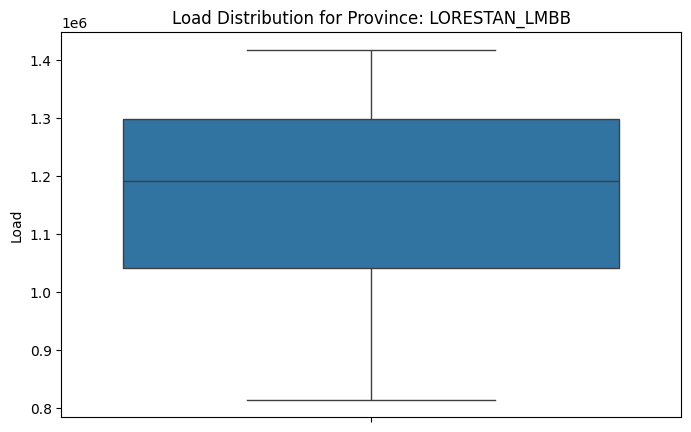

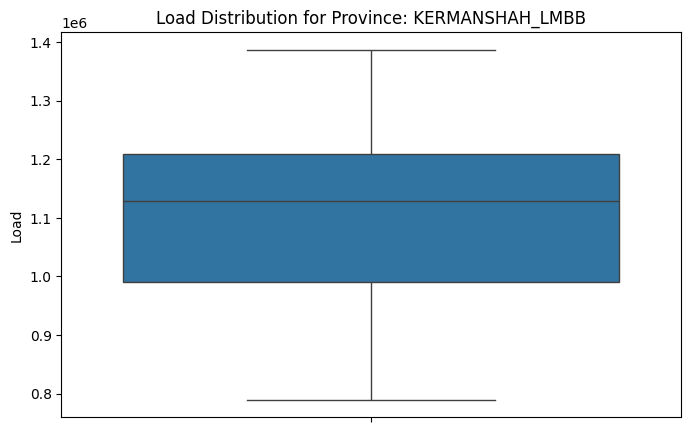

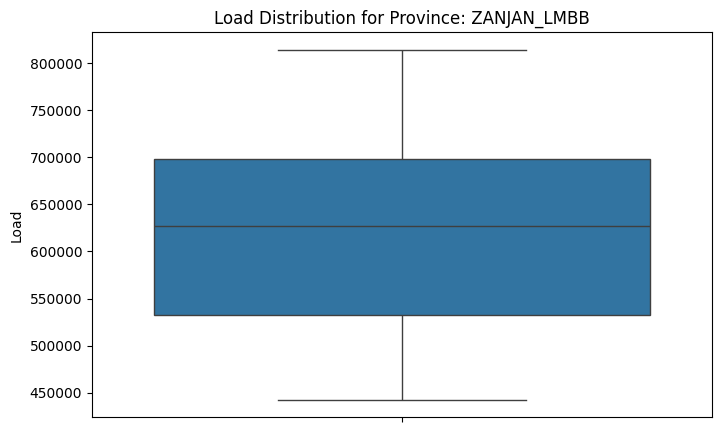

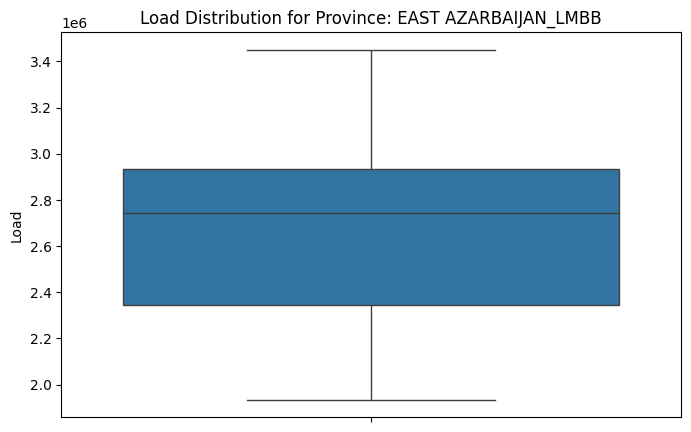

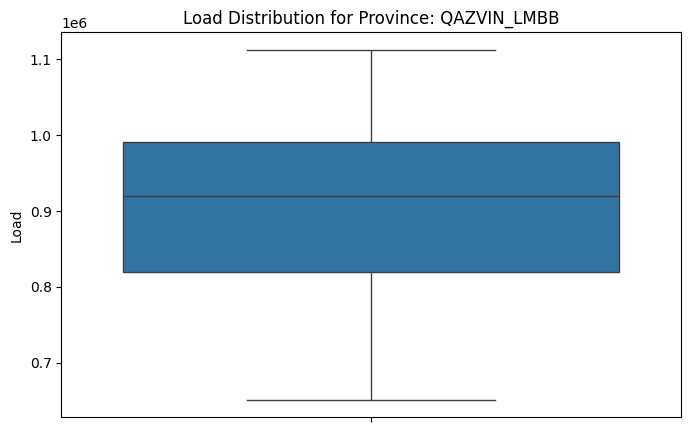

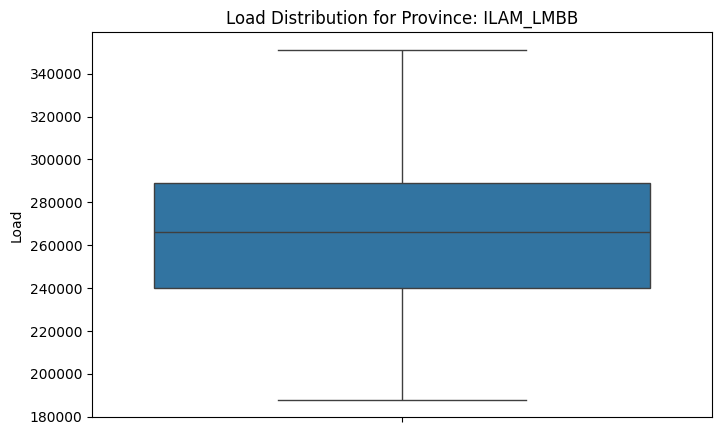

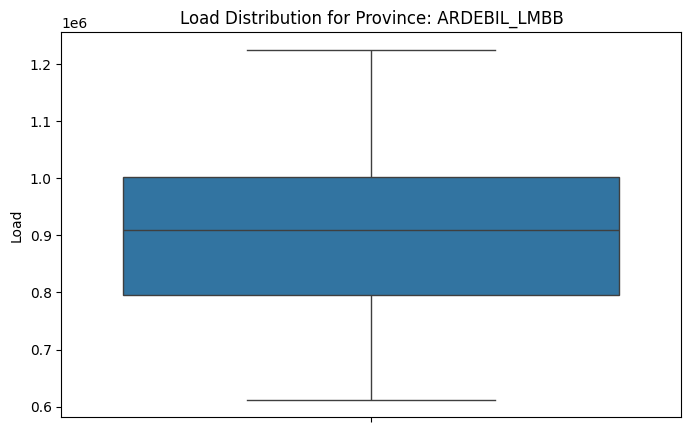

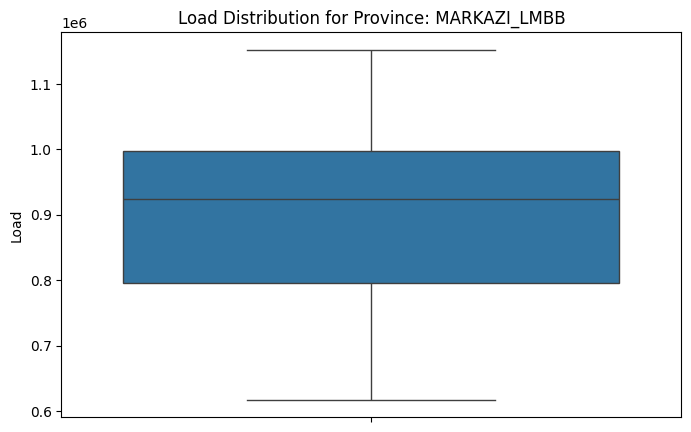

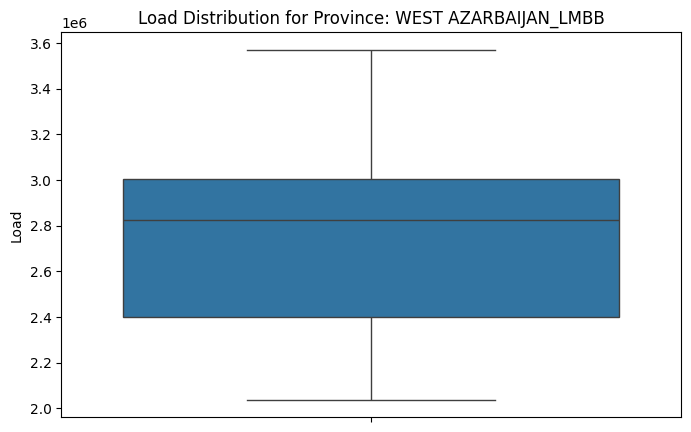

In [12]:
import seaborn as sns

# Box plot for each province
for prov in provinces:
    subset = df[df['PROVINCE'] == prov]
    plt.figure(figsize=(8,5))
    sns.boxplot(y=subset['Load'])
    plt.title(f"Load Distribution for Province: {prov}")
    plt.ylabel("Load")
    plt.show()


## Conclusions:
- The dataset contains measurements from R2&4 provinces over 1 year.
- Load trends vary by province, with some showing clear seasonality or spikes.
- There are missing data patterns that might require targeted imputation.
- Outliers have been detected in the load distribution for certain provinces.

## Next Steps:
- For forecasting, split the data for each province into training and test sets based on PERIOD_START_TIME.
- Develop separate forecasting models (using Prophet, ARIMA, or another method) for each province.
- Address missing data issues with appropriate imputation strategies.
